In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.5)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    


def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
#from planar_utils import *

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

import warnings
warnings.simplefilter('ignore')

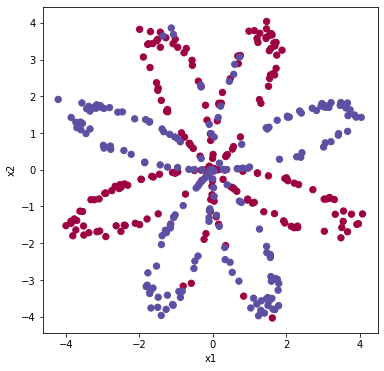

In [ ]:
X, Y = load_planar_dataset()

plt.figure(figsize=(6, 6))

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

### Generate the test set

In [ ]:
X_test = X + np.random.rand(2,X.shape[1])/4
Y_test = Y

### Build the First Model using Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(random_state=0, n_estimators=4)
rclf.fit(X.T, Y.T)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

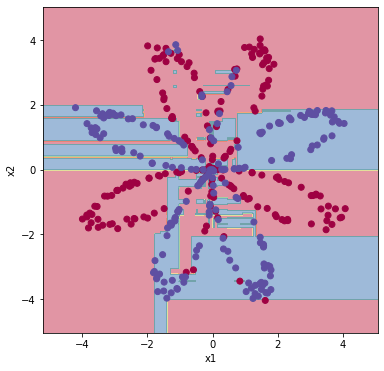

In [ ]:
# Plot the contours of the regions created by the classifier.

plt.figure(figsize=(6, 6))
   
# Set min and max values and give it some padding
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = rclf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.5)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral)
plt.show()

In [ ]:
predictions = rclf.predict(X.T)
s1 = np.dot(Y.ravel(),predictions) 
s2 = np.dot(1-Y.ravel(), 1-predictions)
tot = float(s1) + float(s2)
accuracy = tot/float(Y.size)*100
print('Random Forest Classifier.'+' Training Accuracy ='+str(accuracy))

Random Forest Classifier. Training Accuracy =94.25


In [ ]:
predictions = rclf.predict(X_test.T)
s1 = np.dot(Y_test.ravel(),predictions) 
s2 = np.dot(1-Y_test.ravel(), 1-predictions)
tot = float(s1) + float(s2)
accuracy = tot/float(Y_test.size)*100
print('Random Forest Classifier.'+' Test Accuracy ='+str(accuracy))

Random Forest Classifier. Test Accuracy =79.0


In [ ]:
rclf = RandomForestClassifier(random_state=0, 
                              max_depth=6, 
                              min_samples_leaf=2,
                              min_samples_split=2,
                              n_estimators=8)
rclf.fit(X.T, Y.T)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

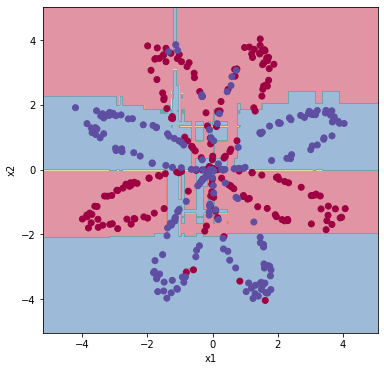

In [ ]:
# Plot the contours of the regions created by the classifier.

plt.figure(figsize=(6, 6))
   
# Set min and max values and give it some padding
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = rclf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.5)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral)
plt.show()

In [ ]:
predictions = rclf.predict(X.T)
s1 = np.dot(Y.ravel(),predictions) 
s2 = np.dot(1-Y.ravel(), 1-predictions)
tot = float(s1) + float(s2)
accuracy = tot/float(Y.size)*100
print('Random Forest Classifier.'+' Training Accuracy ='+str(accuracy))

Random Forest Classifier. Training Accuracy =89.25


In [ ]:
predictions = rclf.predict(X_test.T)
s1 = np.dot(Y_test.ravel(),predictions) 
s2 = np.dot(1-Y_test.ravel(), 1-predictions)
tot = float(s1) + float(s2)
accuracy = tot/float(Y_test.size)*100
print('Random Forest Classifier.'+' Test Accuracy ='+str(accuracy))

Random Forest Classifier. Test Accuracy =84.0
